In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from itertools import combinations
from itertools import permutations
import scipy
import sys
import os
import copy
atish_assay_path = 'fitness_assay_grantedits.py'
sys.path.append(os.path.dirname(os.path.expanduser(atish_assay_path)))
import fitness_assay_grantedits as atish

In [3]:


merged_data = p.read_csv('../data/Final_Technical.csv')
print(merged_data)

     barcode  A.DE1.PCRa.0  A.DE1.PCRa.1  A.DE1.PCRa.2  A.DE1.PCRa.3  \
0         53          1261          3643          2024           167   
1        151         15120         97909         99414         18786   
2        262          1162          2819          1733           181   
3        273          6178         29917         26729          3748   
4        323          3498         17852         14804          1723   
5        415          4616         39231         40247          6810   
6        499             0             0             0             0   
7        622          1006          2652          1394           194   
8        689          1134          9920          9830          2286   
9        697           926          3024          1575           126   
10      1185             2             0             0             0   
11      1322             1             0             0             0   
12      1379         14066         90187         94943         1

In [4]:
### Remove Ancestor (bcs 9999999 (with restriction site) and 7777777 (without res. site))

merged_data = merged_data[~(merged_data['barcode'].isin([7777777,9999999]))]


In [5]:
technical_conditions = {'A':["A.DE1.PCRa","A.DE1.PCRb"],
                       'B':["B.DE1.PCRa","B.DE1.PCRb","B.DE1.PCRc","B.DE2.PCRa","B.DE3.PCRa", "B.DE4.PCRa"],
                       'C':["C.DE1.PCRa","C.DE1.PCRb","C.DE2.PCRa", "C.DE1.PCRc", "C.DE3.PCRa","C.DE3.PCRb"],
                       'D':["D.DE1.PCRa","D.DE1.PCRb"]}

old_conditions = ["SVX13.2",    "SVX18.2",    "SVX20.2",    "SVX21.2",    "SVX23.2",    "SVX3.2",    
"SVX6.2",     "SVX3.3",     "SVX13.1",    "SVX18.1",    "SVX20.1",    "SVX21.1",    "SVX23.1",    "SVX13.3",    "SVX18.3",    "SVX20.3",    "SVX21.3",   
"SVX23.3",    "SVX6.3",     "SVX3.1",     "SVX6.1"    ]
merged_conditions = ["M3_A_13",   "M3_A_18",   "M3_A_1Big", "M3_A_20",   "M3_A_21",   "M3_A_23",   "M3_A_3",    "M3_A_6",    "M3_B_13",   "M3_B_18",   "M3_B_1Big", "M3_B_20",  
"M3_B_21",   "M3_B_23",   "M3_B_3",    "M3_B_6",    "M3_C_13",   "M3_C_18",   "M3_C_1Big", "M3_C_20",   "M3_C_21",   "M3_C_23",   "M3_C_3",    "M3_C_6",   
"M3_D_1Big"]
# bigbatch_conditions = ['A','B','C','D','E','F','G','H','I','J','K','O','P','Y','Z',
#                        'AA','BB','CC','DD','GG']
conditions = technical_conditions
print(conditions)

{'A': ['A.DE1.PCRa', 'A.DE1.PCRb'], 'B': ['B.DE1.PCRa', 'B.DE1.PCRb', 'B.DE1.PCRc', 'B.DE2.PCRa', 'B.DE3.PCRa', 'B.DE4.PCRa'], 'C': ['C.DE1.PCRa', 'C.DE1.PCRb', 'C.DE2.PCRa', 'C.DE1.PCRc', 'C.DE3.PCRa', 'C.DE3.PCRb'], 'D': ['D.DE1.PCRa', 'D.DE1.PCRb']}


In [6]:
data = merged_data
data = data.sort_values('barcode')

cov_thresh = 100

### called neutral by atish's method in ALL 5000 bc experiments (I think - need to verify this)
### [could also be below some set threshold across all experiments]
full_neutral_list = [17615,18486,42040,45014,58284,63611,73731,74185,80465,94896
,120600,125697,132511,134852,135750,190551,228237,238783,255561,298344
,308537,316954,317346,335717,411685,454359,469053]

### from previous list but never has fitness above 3.5% (per gen) in any of 5000bc experiments
supergood_neutral = [17615, 24362, 42040, 71926, 72939, 73802, 80465, 109476, 113483, 
                     134852, 135750, 238783, 263665, 276406, 316954, 335717, 454359]

### pulled from supergood list and spiked into 1BigBatch experiments
neutral_spikes = [17615,24362,42040,71926,73802,109476,113483,134852,263665,316954]

## merge all sets of neutrals together
neutrals = list(np.unique(full_neutral_list+supergood_neutral+neutral_spikes))

neutrals = [bc for bc in data['barcode'].values if bc in neutrals]

# neutrals = sorted(neutrals + data[data['gene'].isin(['NotSequenced'])])
print(neutrals)

fitnesses = {}


for t in range(5):
    for condition in conditions:
        for pair in np.unique(np.asarray(list(permutations(conditions[condition]*2,2))),axis=0):
            
            if ((pair[0]+f'.{t}' in data.columns) and (pair[1]+f'.{t+1}' in data.columns)):
                these_times = [pair[0]+f'.{t}',pair[1]+f'.{t+1}']
                timepoints = [t,t+1]
    
                answer = atish.inferFitness(data['barcode'].values,timepoints,{'rep1':data[these_times].values},neutralBarcodes=neutrals,
                                            lowCoverageThresh=cov_thresh,use_all_neutral=True,weightedMean=False)

                fitnesses[f'{pair[0]}.{t}-{pair[1]}.{t+1}'+'_fitness'] = answer['rep1']['aveFitness']
                fitnesses[f'{pair[0]}.{t}-{pair[1]}.{t+1}'+'_error'] = answer['rep1']['aveError']
                fitnesses['barcode'] = data['barcode'].values

fitness_df = p.DataFrame(fitnesses)

KeyError: 'gene'

In [7]:
data

,barcode,A.DE1.PCRa.0,A.DE1.PCRa.1,A.DE1.PCRa.2,A.DE1.PCRa.3,A.DE1.PCRa.4,A.DE1.PCRb.1,A.DE1.PCRb.2,A.DE1.PCRb.3,A.DE1.PCRb.4,...,SVX6.1.2,SVX6.1.3,SVX6.1.4,SVX6.2.1,SVX6.2.2,SVX6.2.3,SVX6.2.4,SVX6.3.2,SVX6.3.3,SVX6.3.4
0,53,1261,3643,2024,167,424,2548,6337,407,1724,...,65,40,23,140,1,50,24,38,51,22
1,151,15120,97909,99414,18786,85752,67856,323210,44130,281439,...,186670,396925,1128412,83526,6951,568191,370212,108068,452685,496030
2,262,1162,2819,1733,181,344,2037,5228,342,1310,...,289,149,114,553,3,218,64,163,173,57
3,273,6178,29917,26729,3748,14564,20954,84439,9233,49920,...,72380,72903,113298,45097,1437,102486,40227,39614,89767,51220
4,323,3498,17852,14804,1723,5278,12164,46534,3913,21185,...,35198,43792,63584,26369,928,54895,26462,19909,53047,32320
5,415,4616,39231,40247,6810,31301,23785,116151,15200,108652,...,9897,17896,34512,5827,208,26337,13095,5699,20978,15299
6,499,0,0,0,0,0,0,0,0,0,...,5283,7498,13509,3709,106,10898,4849,3011,8999,6000
7,622,1006,2652,1394,194,260,1792,4229,298,852,...,6,7,4,10,0,10,3,4,6,0
8,689,1134,9920,9830,2286,10268,6173,30712,4673,31921,...,16766,24102,51646,9890,336,38812,19463,9450,31479,21947
9,697,926,3024,1575,126,257,1906,4376,265,971,...,105,77,35,141,2,73,26,57,72,29


In [31]:
conditions['B']

['B.DE1.PCRa',
 'B.DE1.PCRb',
 'B.DE1.PCRc',
 'B.DE2.PCRa',
 'B.DE3.PCRa',
 'B.DE4.PCRa']

In [32]:
np.unique(np.asarray(list(permutations(conditions['A']*2,2))),axis=0)

array([['A.DE1.PCRa', 'A.DE1.PCRa'],
       ['A.DE1.PCRa', 'A.DE1.PCRb'],
       ['A.DE1.PCRb', 'A.DE1.PCRa'],
       ['A.DE1.PCRb', 'A.DE1.PCRb']], dtype='<U10')

In [15]:
fitness_df.replace([np.inf, -np.inf], np.nan).dropna()

,A.DE1.PCRa_error,A.DE1.PCRa_fitness,A.DE1.PCRb_error,A.DE1.PCRb_fitness,B.DE1.PCRa_error,B.DE1.PCRa_fitness,B.DE1.PCRb_error,B.DE1.PCRb_fitness,B.DE1.PCRc_error,B.DE1.PCRc_fitness,...,SVX3.2_fitness,SVX3.3_error,SVX3.3_fitness,SVX6.1_error,SVX6.1_fitness,SVX6.2_error,SVX6.2_fitness,SVX6.3_error,SVX6.3_fitness,barcode
0,0.062477,0.393284,0.066146,0.365309,0.057272,0.320916,0.147138,0.779366,0.106742,0.311037,...,0.367077,0.085305,0.340066,0.130678,0.122920,0.184916,0.228015,0.185361,0.346842,53
1,0.050287,1.102676,0.057833,0.964269,0.050217,1.066748,0.100617,1.141633,0.100051,1.223646,...,1.161965,0.057766,1.200280,0.057751,1.571648,0.057762,1.316378,0.070729,1.375278,151
2,0.064033,0.394222,0.067719,0.348748,0.060009,0.296055,0.251299,-0.499397,0.108029,0.341478,...,0.133618,0.066989,0.137699,0.081066,0.085898,0.113279,0.155284,0.122502,0.088744,262
3,0.051034,0.882772,0.058200,0.779232,0.050647,0.840981,0.101510,1.557007,0.100240,0.888477,...,0.777077,0.057809,0.841233,0.057795,1.016646,0.057894,0.781974,0.070819,0.741759,273
4,0.051928,0.766347,0.058784,0.677557,0.051425,0.756056,0.113146,0.387211,0.100583,0.804235,...,0.842569,0.057836,0.831596,0.057847,1.005665,0.057997,0.821119,0.070890,0.855403,323
5,0.050712,1.142149,0.058012,0.996526,0.050580,1.002897,0.101211,1.616727,0.100153,1.291175,...,1.189610,0.057985,1.155310,0.058056,1.343166,0.058499,1.089571,0.071139,1.106137,415
8,0.052426,1.202127,0.058645,1.035737,0.051994,1.058448,0.102946,1.887421,0.100508,1.342199,...,1.182151,0.057867,1.188260,0.057941,1.294108,0.058230,1.045533,0.071000,1.034126,689
9,0.066189,0.345660,0.069981,0.268663,0.058476,0.306663,0.168782,0.725278,0.109607,0.254171,...,0.318062,0.076827,0.343701,0.107267,0.163932,0.155448,0.234172,0.163159,0.280198,697
12,0.050309,1.107999,0.057835,0.930737,0.050218,0.996895,0.100381,1.754571,0.100054,1.252753,...,1.136062,0.057749,1.127072,0.057748,1.402996,0.057764,1.138243,0.070728,1.221531,1379
13,0.050902,1.123702,0.058072,0.959721,0.050748,0.975557,0.101105,1.878225,0.100186,1.262433,...,1.175351,0.057798,1.123045,0.057815,1.313934,0.057919,1.087693,0.070821,1.103374,1488


In [43]:
fitness_df.to_csv('../data/fitnesses_Final_Technical_byTimepoint.csv',index=False)

In [20]:
zipping = [(col,len(data[col].values)-np.count_nonzero(data[col])) for col in data.columns]
sorted(zipping,key=lambda x:x[1],reverse=True)

[('SVX6.2.2', 172),
 ('SVX23.3.4', 78),
 ('C.DE1.PCRb.0', 73),
 ('SVX21.2.2', 73),
 ('SVX23.2.1', 73),
 ('C.DE1.PCRa.0', 72),
 ('SVX21.1.0', 72),
 ('B.DE4.PCRa.2', 71),
 ('SVX21.2.0', 70),
 ('SVX23.1.2', 70),
 ('A.DE1.PCRb.3', 68),
 ('B.DE4.PCRa.0', 67),
 ('C.DE1.PCRa.2', 67),
 ('D.DE1.PCRa.3', 67),
 ('SVX21.1.4', 67),
 ('D.DE1.PCRb.2', 66),
 ('SVX20.1.1', 66),
 ('SVX23.1.1', 66),
 ('SVX23.3.1', 66),
 ('B.DE1.PCRb.3', 65),
 ('SVX23.2.3', 65),
 ('D.DE1.PCRb.1', 64),
 ('A.DE1.PCRa.3', 63),
 ('C.DE1.PCRc.0', 63),
 ('D.DE1.PCRb.3', 63),
 ('SVX21.3.4', 63),
 ('C.DE1.PCRa.4', 62),
 ('C.DE2.PCRa.2', 62),
 ('SVX21.2.1', 62),
 ('B.DE1.PCRa.1', 61),
 ('C.DE1.PCRa.3', 61),
 ('SVX23.3.3', 61),
 ('A.DE1.PCRb.4', 60),
 ('B.DE1.PCRb.2', 60),
 ('C.DE1.PCRc.1', 60),
 ('D.DE1.PCRa.4', 60),
 ('A.DE1.PCRa.4', 59),
 ('SVX20.2.3', 59),
 ('A.DE1.PCRb.1', 58),
 ('SVX23.1.3', 58),
 ('C.DE2.PCRa.4', 57),
 ('D.DE1.PCRa.2', 57),
 ('SVX20.2.4', 57),
 ('A.DE1.PCRb.2', 56),
 ('C.DE2.PCRa.0', 56),
 ('SVX20.2.2', 56),

In [45]:
[col for col in data.columns if 'Y.' in col]

[]

In [54]:
[(x,y) for x,y in zip([col for col in data.columns if 'B.' in col],np.nansum(data[[col for col in data.columns if 'B.' in col]],axis=0))]

[('B.DE1.PCRa.0', 5536506),
 ('B.DE1.PCRa.1', 375884),
 ('B.DE1.PCRa.2', 8288683),
 ('B.DE1.PCRa.3', 15761832),
 ('B.DE1.PCRa.4', 22409026),
 ('B.DE1.PCRb.2', 267520),
 ('B.DE1.PCRb.3', 254055),
 ('B.DE1.PCRc.2', 4419969),
 ('B.DE1.PCRc.3', 4600890),
 ('B.DE2.PCRa.0', 4115366),
 ('B.DE2.PCRa.2', 4191204),
 ('B.DE2.PCRa.4', 13673320),
 ('B.DE3.PCRa.2', 1189785),
 ('B.DE3.PCRa.4', 1243903),
 ('B.DE4.PCRa.0', 74790),
 ('B.DE4.PCRa.2', 302270),
 ('B.DE4.PCRa.4', 1472652)]

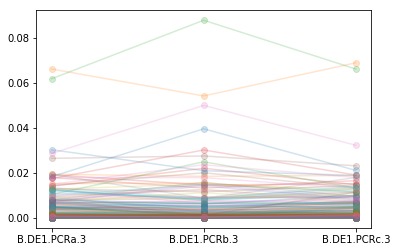

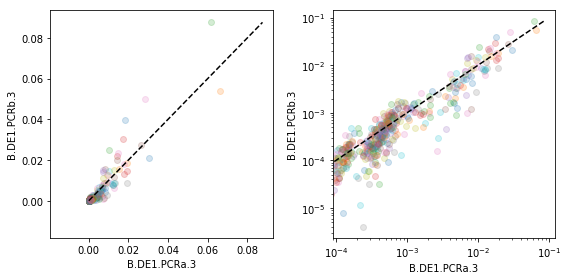

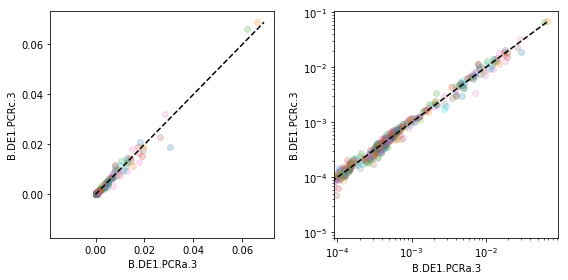

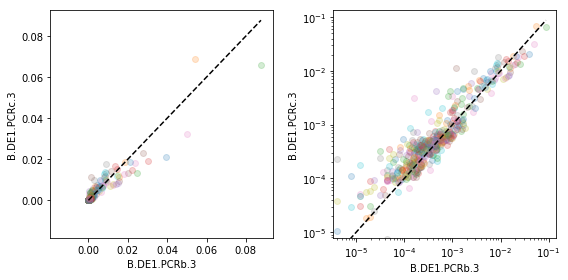

In [27]:

data = merged_data
data = data.sort_values('barcode')

flask = 'B'
time = '3'

samples = [col for col in data.columns if f'{flask}.' in col and f'.{time}' in col]

freqs = data[samples].values/np.nansum(data[samples].values,axis=0)


for bc in range(freqs.shape[0]):
    
    plt.plot(freqs[bc,:],'-o',alpha=0.2)
    
plt.xticks(range(len(samples)),samples)
plt.savefig(f'technical_reps_frequency_comparison_{flask}_{time}.pdf',bbox_inches='tight')

for pair in combinations(range(3),2):
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    for bc in range(freqs.shape[0]):
        plt.scatter(freqs[bc,pair[0]],freqs[bc,pair[1]],alpha=0.2)
    bigmax = max([max(freqs[:,pair[0]]),max(freqs[:,pair[1]])])
    plt.plot([0,bigmax],[0,bigmax],'k--')
        
    plt.xlabel(samples[pair[0]])
    plt.ylabel(samples[pair[1]])
    
    
    plt.subplot(1,2,2)
    for bc in range(freqs.shape[0]):
        plt.scatter(freqs[bc,pair[0]],freqs[bc,pair[1]],alpha=0.2)
    bigmax = max([max(freqs[:,pair[0]]),max(freqs[:,pair[1]])])
    plt.plot([0,bigmax],[0,bigmax],'k--')
        
    plt.xlabel(samples[pair[0]])
    plt.ylabel(samples[pair[1]])
    plt.yscale('log')
    plt.xscale('log')
    plt.tight_layout()
    plt.savefig(f'technical_reps_frequency_comparison_pairwise_{samples[pair[0]]}_{samples[pair[1]]}.pdf',bbox_inches='tight')

In [11]:
np.nansum(data[[col for col in data.columns if 'B.' in col and '.3' in col]],axis=0)

array([15761832,   254055,  4600890])

In [16]:
freqs

,B.DE1.PCRa.3,B.DE1.PCRb.3,B.DE1.PCRc.3
0,4.896639e-04,0.000575,5.083799e-04
1,6.604156e-02,0.054114,6.881451e-02
2,3.460258e-04,0.000126,4.242657e-04
3,1.406918e-02,0.022003,1.472498e-02
4,6.745599e-03,0.002389,6.064479e-03
5,2.641907e-02,0.027478,2.311357e-02
6,0.000000e+00,0.000000,0.000000e+00
7,3.545273e-04,0.000189,3.464547e-04
8,7.050576e-03,0.011198,6.954089e-03
9,4.387815e-04,0.000362,3.518884e-04
